# 추측통계

- 통계량으로 모수를 추정하여 모집단을 설명
- 모집단을 잘 설명할 수 잇는 표본을 잘 뽑아야 한다.

In [2]:
#모집단과 표본
#표본 추출 방법

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df=pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores=np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [3]:
#1,2,3중에서 3개를 뽑아라. 

np.random.choice([1,2,3],3,replace=False)
#replace = False -> 중복이 안되게 해줌

array([2, 3, 1])

In [4]:
np.random.seed(0)
sample=np.random.choice(scores,20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [5]:
sample.mean() #표본의 평균

70.4

In [6]:
scores.mean() #모집단의 평균은 표본의 평균과 다름

69.53

In [7]:
for i in range(5):
    sample = np.random.choice(scores,20)
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균',sample.mean(),'\n')
    
    #모집단의 모평균과 표본평균은 차이가 있다.
    #이 코드의 결과값만 봐도 하나도 69.53과 같은 값이 없다.

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본평균 74.15 



### 확률 변수
확률변수에 대응해서 확률이 있다. 
- 동전 던지기의 확률변수는 0과 1. = 확률: 1/2
- 주사위의 확률변수는 1,2,3,4,5,6. = 확률: 1/6
- 확률변수 (x), 확률 (y)
- 확률 분포 : 각각의 확률변수 (x)에 대응되는 y값의 궤적을 그린 그림. 
    - 어떤 데이터든 평균일 때가 확률이 가장 높다.
    - 모집단이 정규분포거나  표본의 분포도 정규분포를 따른다고 한다면 굉장히 추정하기 편하다. => 모집단의 분포가 중요한 이유.
   

In [8]:
dice=[1,2,3,4,5,6]
prob=[1/21,2/21,3/21,4/21,5/21,6/21] 
#주사위가 왜곡이 되어 6이 될 수 있는 확률이 더 높다고 가정했을 때

np.random.seed(1)
num_trial=100
sample=np.random.choice(dice,num_trial,p=prob) #6이 가장 많이 나오게 된다.
#랜덤하게 뽑지만 prob의 확률을 전제하에 랜덤하게 출력

sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [9]:
#위에서 뽑은 100개를 이용해 주사위로 나올 수 있는 빈도를 구해봄

freq,_=np.histogram(sample,bins=6, range=(1,7))
print(freq,'\n')

rdf=pd.DataFrame({'frequency':freq,
                 'relative frequency':freq/num_trial},
                index=pd.Index(np.arange(1,7),name='dice'))
rdf #여기에서는 위에서 설정한 확률로 나오지 않았음. 

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


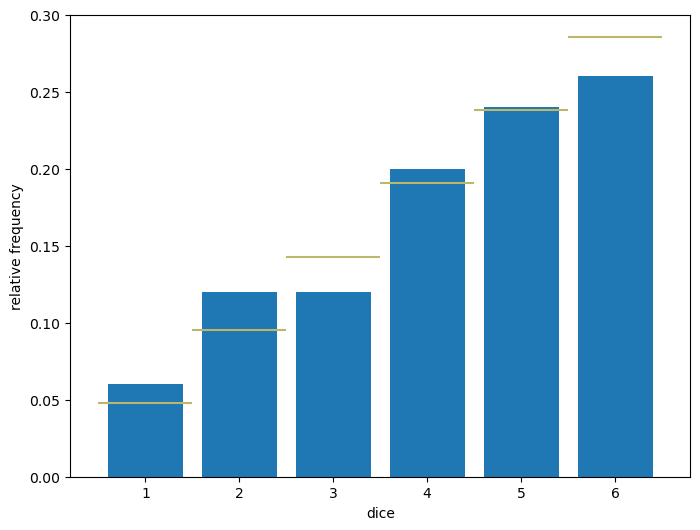

In [10]:
np.linspace(1.5,6.5,6) #1.5와 6.5를 6개 사이에 넣어라
np.random.seed(1)
num_trial=100
sample=np.random.choice(dice,num_trial,p=prob)

plt.figure(figsize=(8,6))
plt.hist(sample,bins=6, range=(1,7), density=True, rwidth=0.8)
plt.hlines(prob,np.arange(1,7),np.arange(2,8),colors='darkkhaki')
#1과 2, 3과 4, 5와 6, 7과 8. 이렇게 순차적으로 그래프가 붙는다는 뜻
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7)) #x, x_labels
# plt.xtickables(np.arange(1,7))
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

#오차발생

In [11]:
#1000000번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포는 실제 확률분포와 근접.
#시행 횟수를 늘리면 상대도수는 확률분포를 수렴한다.
# 즉, 샘플수가 많을 수록 정확해짐
#랜덤이기 때문에 시행횟수가 적으면 오차 발생율이 높아짐

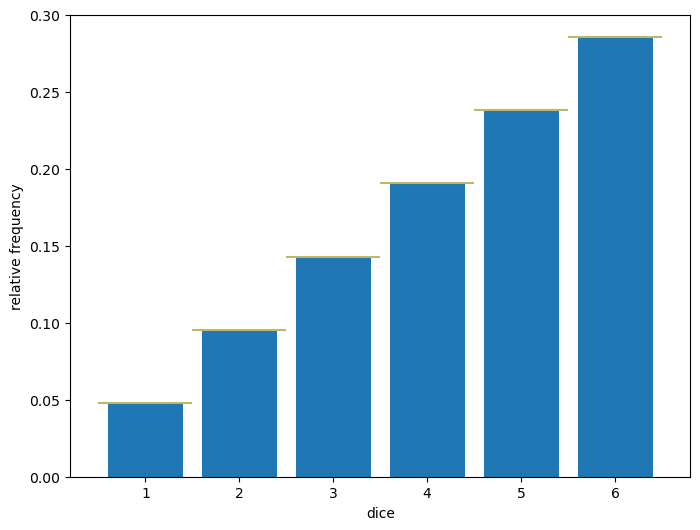

In [14]:
np.linspace(1.5,6.5,6)
np.random.seed(1)
num_trial = 1000000 #샘플개수
sample = np.random.choice(dice,num_trial,p=prob)

plt.figure(figsize=(8,6))
plt.hist(sample, bins = 6, range = (1,7), density=True, rwidth=0.8)
#density는 히스토그램의 y축 값을 상대빈도로 나타내는지 
#아니면 실제 빈도로 나타내는지 설정하는데 사용하는데
#이 예제에서는 상대빈도로 나타내도록 설정.

#rwidth는 각 막대의 너비를 결정

plt.hlines(prob,np.arange(1,7),np.arange(2,8),colors='darkkhaki')
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7))
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show() #딱떨어지는 그림 출력됨

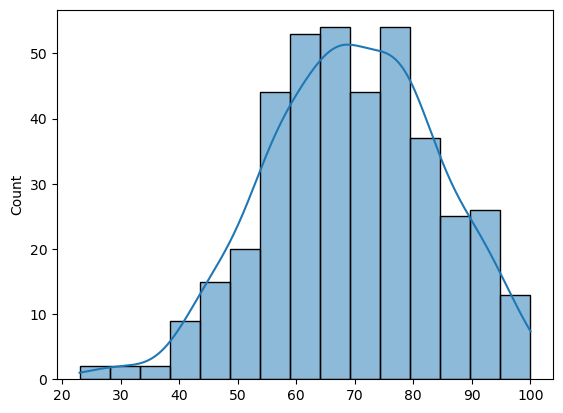

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores=np.array(df.score)
sns.histplot(scores,kde=True)
plt.show()


In [16]:
scores.shape

(400,)

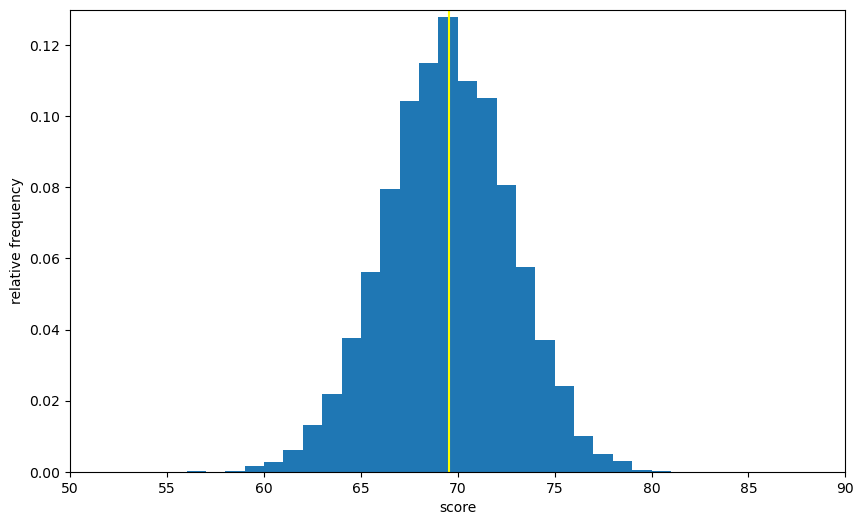

In [21]:
#표본의 평균이 어떤 분포를 이루는지 본다.
#표본평균은 모평균을 중심으로 분포하는 것을 확인.
#무작위 추출에 의한 표본 평균으로 모평균을 추측할 수 있는 근거가 된다.
#근거가 어떻게 나오는지 찾는게 중요!
#scores 를 모집단으로 둠.

sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]
#샘플사이즈 20개를 10000개 뽑아서 평균구하기
len(sample_mean)

fig=plt.figure(figsize=(10,6))
plt.hist(sample_means,bins=100, range=(0,100),density=True)

#모평균을 세로선으로 표시. 표본평균과 모평균 비교

plt.vlines(np.mean(scores),0,1,'yellow')
plt.axis([50,90,0,0.13]) #50,90은 x축 범위, 0,0.13은 y축 범위
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.show()

#히스토그램을 1만개의 표본평균 분포
#모평균(모집단)을 중심으로 정규분포를 그리고 있다.

확률론은 불확실성이 존재하는 상황에서 결과의 가능성을 수학적으로 모델링 하는 분야입니다. 이를 위해 몇가지 중요한 개념이 필요합니다. 이 중요한 개념들은 다음과 같습니다.

- 실험과 표본 공간
    - 확률론에서는 특정한 조건에서 일어나는 사건을 실험이라고 하며, 실험에서 가능한 모든 결과의 집합을 표본 공간이라고 합니다.
- 사건과 확률
    - 사건은 표본 공간의 부분집합으로, 일어날 가능성이 있는 결과의 집합을 의미합니다. 확률은 특정 사건이 일어날 가능성을 나타내는 값으로, 0과 1 사이의 값입니다. (표본 공간의 합은 1)
- 조건부 확률
    - 조건부 확률은 특정한 사건이 일어났을 때, 다른 사건이 일어날 확률을 의미합니다. 조건부 확률은 주어진 사건이 일어난 경우에만 적용되며, 이전 확률과는 다른 개념입니다. 
- 독립성
    - 두 사건이 독립적이라는 것은, 하나의 사건이 일어나는 것이 다른 사건의 발생 가능성에 영향을 미치지 않는다는 것을 의미합니다. 이러한 경우, 두 사건의 결합 확률은 두 확률의 곱과 같습니다.
- 확률분포
    - 확률분포는 가능한 모든 결과에 대해 각각의 결과가 일어날 확률을 나타내는 함수입니다. 대표적인 예로 이항분포, 정규분포 등이 있습니다.
- 기대값
    - 기대값은 확률분포와 관련되어, 각 결과의 확률과 그 결과의 가치를 곱한 값을 모두 더한 것 입니다. 즉, 평균값과 유사한 개념입니다.

In [ ]:
확률의 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다.

- 빈도주의 관점에서는 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 정의합니다. 
즉, 많은 반복을 통해 어떤 사건이 발생하는 비율을 계산하는 것입니다.
이 관점에서는 데이터가 수집될 때마다 확률값이 달라지지 않는다고 가정하며, 
샘플 크기가 커질수록 이론적인 확률값과 가까워진다고 봅니다.

- 반면에 베이지안 관점에서는 확률을 "사건이 일어날 가능성"으로 정의합니다. 
이 관점에서는 데이터를 수집하기 전에 이미 어떤 사전 지식이 있다는 가정하게 데이터를 수집하고,
그에 따라 사후 확률을 갱신합니다. 이는 사전 지식과 데이터를 통해 모델 파라미터의 
확률 분포를 추정하고, 이를 통해 불확실성을 줄이는 것입니다.
- 이러한 차이 때문에 빈도주의 관점에서는 확률을 정확하게 계산하고자 반복 실험을 수행하며,
이론적인 확률값에 근접하도록 데이터 크기를 늘립니다.
반면에 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결함하여
모델의 불확실성을 추정합니다.
- 결론적으로, 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다.
빈도주의 관점은 확률을 실험에서 어떤 사건이 일어날 빈도로 이해하며, 베이지안 관점은 확률을
어떤 사건이 일어날 가능성으로 이해합니다. 
이러한 차이로 인해 빈도주의와 베이지안 방법은 다양한 문제 해결에 사용됩니다.
예를 들어, 빈도주의 방법은 통계적 추론에 사용되며, 베이지안 방법은 패턴 인식, 머신러닝, 자연러 처리 분야등에서 사용됩니다.

빈도주의 관점은 "반복된는 실험에서 어떤 사건이 일어날 빈도"로 이해하는 것입니다.
이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를들어, 동전을 던져서 앞면이 나올 확률이 얼마나 되는지 알아보려고 한다고 가정해봅시다.\
이 경우, 동전을 반복적으로 던져서 앞면이 나올 확률을 계산하는 것이 빈도주의 관점입니다.
- 100번의 실험을 수행하면서 앞면이 60번 나왔다면, 앞면이 나올확률은 0.6, 즉 60%입니다.
이처럼 빈도주의 관점에서는 반복적인 실험을 통해 얻은 데이터를 바탕으로 확률을 계산합니다.
